## 1. Introduction and problem definition

## Introduction
The dataset under consideration comprises 9358 instances of hourly averaged responses generated by an ensemble of 5 metal oxide chemical sensors integrated into an Air Quality Chemical Multisensor Device. Deployed at road level within an Italian city's significantly polluted area, this device recorded data continuously from March 2004 to February 2005, offering the longest freely accessible dataset of on-field deployed air quality chemical sensor responses.

### Task 1 Problem Definition
In Task 1, the goal is to predict the concentration of carbon monoxide (CO) in the air. The primary objective is to establish a predictive model for CO concentrations using machine learning techniques, with CO(GT) serving as the ground truth for training and evaluation. Accurate predictions can assist in identifying patterns and factors influencing CO concentrations, contributing to a more comprehensive understanding of air quality dynamics.

### Task 2 custom Air Quality Index (AQI)
For Task 2, the objective is to define a custom Air Quality Index (AQI) by combining ground-truth readings of various gases, leveraging multiple raw sensor readings and other relevant columns without using the ground-truth columns in the prediction process. The AQI serves as a comprehensive indicator of overall air quality, incorporating information from different pollutants. The challenge lies in creating an effective index that captures the complexities of air quality and developing a machine learning model capable of predicting this composite index.

## 2. Data ingeston

In [47]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import r2_score


In [3]:

# Load the data
df = pd.read_csv('D:\Python\AirQuality.csv')
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01:00:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T(C)           9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(7), int64(8), object(2)
memory usage: 1.2

In [5]:
df.shape

(9357, 17)

In [6]:
# Display statistical data types
print(df.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T(C)             float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object



#### Categorical data
*Ordinal*: Date, date

#### Numerical data
*Continuous*: CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T(C), RH, AH.


In [7]:

# Drop empty columns and unnecessary ones
df = df.drop(["Unnamed: 15", "Unnamed: 16"], axis=1)
# Replace "-200" values with np.nan
df.replace(-200, np.nan, inplace=True)

# Create a new attribute for the day of the week
df["DayOfWeek"] = pd.to_datetime(df["Date"], dayfirst=True).dt.day_name()
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,DayOfWeek
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday
5,10/03/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,Wednesday
6,11/03/2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,Thursday
7,11/03/2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,Thursday
8,11/03/2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,Thursday
9,11/03/2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517,Thursday


In [8]:
from datetime import time

# Convert "Time" to datetime format
df["Time"] = pd.to_datetime(df["Time"])

# Create fields indicating peak time for working days (8-12 and 18-22) and weekends (9-12)
df["PeakTime"] = (
    ((df["Time"].dt.dayofweek < 5) & (df["Time"].dt.time.between(time(8, 0), time(12, 0)) | df["Time"].dt.time.between(time(18, 0), time(22, 0)))) |
    ((df["Time"].dt.dayofweek >= 5) & df["Time"].dt.time.between(time(9, 0), time(12, 0)))
)

C:\Users\mahsa\AppData\Local\Temp\ipykernel_25072\380240397.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"])


In [9]:
df["ValleyTime"] = df["Time"].dt.time.between(time(2, 0), time(6, 0))

In [10]:
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,DayOfWeek,PeakTime,ValleyTime
0,10/03/2004,2023-12-09 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,False,False
1,10/03/2004,2023-12-09 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday,False,False
2,10/03/2004,2023-12-09 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday,False,False
3,10/03/2004,2023-12-09 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday,False,False
4,10/03/2004,2023-12-09 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday,False,False


# TASK 1: CO concentration prediction
Predict the CO concentration (in mg/m3) based on, at least, the PT08.S1(CO) raw sensor readings, day of the week and time. 

Maybe temperature and humidity can play a role as well? 

Use CO(GT) as the ground truth.

## 4. Further Data preparation (specific for this task)
## Data segregation


In [11]:
# Further dropping of unnecessary columns
df_task1 = df.drop(["Time", "Date"], axis=1)
df_task1.head(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,DayOfWeek,PeakTime,ValleyTime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,False,False
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday,False,False
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday,False,False
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday,False,False
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday,False,False


In [12]:
# Check for missing values and calculate the percentage
missing_values = df_task1.isnull().sum()
percentage_missing = (missing_values / len(df_task1)) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Display the missing information
print(missing_info)


               Missing Values  Percentage Missing
CO(GT)                   1672           17.868975
PT08.S1(CO)               366            3.911510
NMHC(GT)                 8443           90.231912
C6H6(GT)                  366            3.911510
PT08.S2(NMHC)             366            3.911510
NOx(GT)                  1639           17.516298
PT08.S3(NOx)              366            3.911510
NO2(GT)                  1642           17.548360
PT08.S4(NO2)              366            3.911510
PT08.S5(O3)               366            3.911510
T(C)                      366            3.911510
RH                        366            3.911510
AH                        366            3.911510
DayOfWeek                   0            0.000000
PeakTime                    0            0.000000
ValleyTime                  0            0.000000


#### Handling missing values

CO(GT): For the target variable it's not advisable to impute missing values because it's the variable we are trying to predict. Removing rows with missing CO(GT) values might be a reasonable approach.

NMHC(GT): With 90% missing values, is preferred as retaining it may introduce significant uncertainty and potential bias, compromising the reliability of analyses or models that rely on this variable. Removing it ensures a cleaner dataset and avoids potentially misleading interpretations due to the high proportion of missing information.

In [13]:
df_task1 = df_task1.dropna(subset=['CO(GT)'])
df_task1 = df_task1.drop(columns=['NMHC(GT)'])

In [14]:
#Impute missing values of the remaining columns using the mean each respective column. This helps to preserve the overall distribution of the data.

columns_to_fill = ['C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T(C)', 'RH', 'AH','PT08.S1(CO)']

# Fill missing values with mean for selected columns
df_task1[columns_to_fill] = df_task1[columns_to_fill].fillna(df_task1[columns_to_fill].mean())


In [15]:
# Check for missing values and calculate the percentage
missing_values = df_task1.isnull().sum()
percentage_missing = (missing_values / len(df_task1)) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Display the missing information
print(missing_info)

               Missing Values  Percentage Missing
CO(GT)                      0                 0.0
PT08.S1(CO)                 0                 0.0
C6H6(GT)                    0                 0.0
PT08.S2(NMHC)               0                 0.0
NOx(GT)                     0                 0.0
PT08.S3(NOx)                0                 0.0
NO2(GT)                     0                 0.0
PT08.S4(NO2)                0                 0.0
PT08.S5(O3)                 0                 0.0
T(C)                        0                 0.0
RH                          0                 0.0
AH                          0                 0.0
DayOfWeek                   0                 0.0
PeakTime                    0                 0.0
ValleyTime                  0                 0.0


#### Data bining

We have decided to categorize 'Temperature' ('T(C)') and 'Relative Humidity' ('RH') to simplify our analysis. By examining the range of these columns, we identified three levels for each variable:

Low: Values below the 25th percentile.
Medium: Values between the 25th and 75th percentiles.
High: Values above the 75th percentile.
For coding simplicity, we assign labels 1, 2, and 3 to represent low, medium, and high levels, respectively. This categorization allows us to capture patterns more intuitively, facilitating interpretation and communication of the impact of temperature and humidity on air quality.

In [16]:

# Define bin edges and labels
temperature_bins = [-float('inf'), 15, 25, float('inf')]  # Example bin edges for temperature
humidity_bins = [-float('inf'), 40, 70, float('inf')]     # Example bin edges for humidity

temperature_labels = [1, 2, 3]
humidity_labels = [1, 2, 3]

# Bin the data
df_task1['TemperatureCategory'] = pd.cut(df_task1['T(C)'], bins=temperature_bins, labels=temperature_labels, include_lowest=True)
df_task1['HumidityCategory'] = pd.cut(df_task1['RH'], bins=humidity_bins, labels=humidity_labels, include_lowest=True)


In [17]:
df_task1.head(5)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,DayOfWeek,PeakTime,ValleyTime,TemperatureCategory,HumidityCategory
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Wednesday,False,False,1,2
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Wednesday,False,False,1,2
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Wednesday,False,False,1,2
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Wednesday,False,False,1,2
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Wednesday,False,False,1,2


#### Encoding

Encoding "DayOfWeek" into dummy variables using pd.get_dummies is crucial for transforming categorical day information into a format suitable for machine learning models. The original categorical column is converted into binary columns, each representing a specific day. This enables machine learning algorithms to work with numerical input, treating days as separate entities without introducing ordinal relationships. The resulting binary values (0 or 1) indicate the presence or absence of each day, allowing the model to effectively learn patterns associated with different days during training.

In [18]:
df_task1 = pd.get_dummies(df_task1, columns=["DayOfWeek"])
df_task1.head(5)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),...,ValleyTime,TemperatureCategory,HumidityCategory,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,...,False,1,2,False,False,False,False,False,False,True
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,...,False,1,2,False,False,False,False,False,False,True
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,...,False,1,2,False,False,False,False,False,False,True
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,...,False,1,2,False,False,False,False,False,False,True
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,...,False,1,2,False,False,False,False,False,False,True


#### Feature Selection

The feature importance analysis, inspired by "Artificial Intelligence with Python," utilized the Extra Trees Classifier to identify the top five influential features for predicting the target variable. These features, including PT08.S4(NO2), PT08.S1(CO), NOx(GT), PT08.S2(NMHC), and C6H6(GT), were chosen based on their importance scores. This method follows the standard practice of selecting key features to enhance the model's interpretability, efficiency, and generalization to new data.

Feature Importances:
[0.15068327 0.23026419 0.25239678 0.11576184 0.02964116 0.03125131
 0.02101787 0.10568488 0.0091554  0.00493431 0.00589594 0.00381563
 0.00935913 0.00858266 0.0031749  0.00361002 0.00330968 0.00306726
 0.00214352 0.00182944 0.00240905 0.00201175]


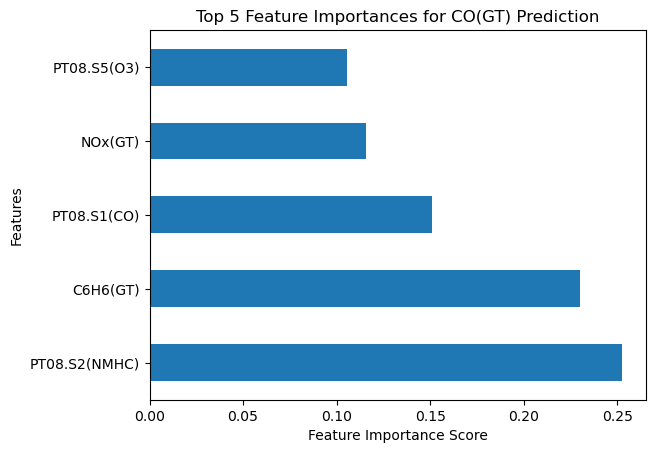

In [20]:


X = df_task1.drop(columns=['CO(GT)'])  # Independent columns
y = df_task1['CO(GT)']  # Target variable

# Create and fit the Extra Trees Regressor model
model = ExtraTreesRegressor()
model.fit(X, y)

# Print feature importances
print("Feature Importances:")
print(model.feature_importances_)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Top 5 Feature Importances for CO(GT) Prediction")
plt.show()


In [21]:
df_task1.head(2)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),...,ValleyTime,TemperatureCategory,HumidityCategory,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,...,False,1,2,False,False,False,False,False,False,True
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,...,False,1,2,False,False,False,False,False,False,True


#### Data Splite


The 80-20 data split, dedicating 80% for training and 20% for testing, is a widely accepted practice in machine learning. This approach ensures a substantial training set for robust pattern learning while providing a significant portion for assessing model generalization to new data. The balance prevents overfitting, evaluating the model on a sizable testing set without compromising training data. The 80-20 split, adhering to industry standards, strikes an effective compromise between training and testing requirements in diverse machine learning applications.

In [22]:


# Select features for Task 1
features_task1 = df_task1[['PT08.S4(NO2)', 'PT08.S1(CO)', 'NOx(GT)', 'PT08.S2(NMHC)', 'C6H6(GT)', 'CO(GT)']]

# Split the dataset into 80% train and 20% test
train_df = features_task1.sample(frac=0.8, random_state=42)
test_df = features_task1.drop(train_df.index)

# Print the first 5 rows of the training and testing sets
print(train_df.head(5))
print(test_df.head(5))

# Automatic Test to check whether your split was correct
assert train_df.shape[0] >= 6148 and train_df.shape[0] <= 6149
assert test_df.shape[0] >= 1536 and test_df.shape[0] <= 1537



      PT08.S4(NO2)  PT08.S1(CO)  NOx(GT)  PT08.S2(NMHC)   C6H6(GT)  CO(GT)
2861    1827.00000  1222.000000    173.0    1161.000000  15.400000     2.1
8177    1013.00000  1295.000000    164.0    1639.000000  33.900000     2.5
8012     868.00000   960.000000    219.0     784.000000   5.400000     1.4
9296     768.00000   835.000000    102.0     546.000000   1.500000     0.6
7177    1444.89259  1110.680218    728.0     947.331883  10.281074     5.0
    PT08.S4(NO2)  PT08.S1(CO)     NOx(GT)  PT08.S2(NMHC)  C6H6(GT)  CO(GT)
3         1584.0       1376.0  172.000000          948.0       9.2     2.2
4         1490.0       1272.0  131.000000          836.0       6.5     1.6
5         1393.0       1197.0   89.000000          750.0       4.7     1.2
9         1235.0       1010.0  255.313869          561.0       1.7     0.6
17        1362.0       1179.0   95.000000          762.0       5.0     1.5


In [23]:
# Extract the target column 'CO(GT)' from the train and test dataframes
y_train_task1 = train_df['CO(GT)']
y_test_task1 = test_df['CO(GT)']

# Drop the target column 'CO(GT)' from the train and test dataframes
X_train_task1 = train_df.drop(columns=['CO(GT)'])
X_test_task1 = test_df.drop(columns=['CO(GT)'])


## 5. Model definition and training


In Task 1 model training, I employed a two-step strategy, beginning with a Linear Regression baseline model chosen for its simplicity and interpretability. This model was then optimized using Ridge Regression, a regularization technique, through Grid Search for hyperparameter tuning. The regularization parameter (alpha) was set to 10, resulting in an enhanced and tuned Ridge model. This approach adheres to the coursework's directive to use distinct regression models and showcase a systematic hyperparameter optimization process, providing a clear evolution from a basic, interpretable model to an improved version.

#### Baseline Model

In [24]:
# Regression model selection and baseline
model_task1_baseline = LinearRegression()
model_task1_baseline.fit(X_train_task1, y_train_task1)
y_pred_task1_baseline = model_task1_baseline.predict(X_test_task1)
baseline_error_task1 = mean_squared_error(y_test_task1, y_pred_task1_baseline)

#### Optimize Model

In [25]:


param_grid = {'alpha': [0.1, 1, 10]}  # Example values for alpha, adjust as needed

# Create a Ridge regression model
ridge_model = Ridge()

# Use Mean Squared Error as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform grid search
grid_search = GridSearchCV(ridge_model, param_grid, scoring=mse_scorer, cv=5)
grid_search.fit(X_train_task1, y_train_task1)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new instance of Ridge with the best hyperparameters
best_ridge_model = Ridge(**best_params)

# Fit the best model on the entire training dataset
best_ridge_model.fit(X_train_task1, y_train_task1)


Ridge(alpha=10)

## 6. Model evaluation



In Task 1 model evaluation, I utilized R-squared as the primary metric for assessing the predictive performance of both the baseline Linear Regression and the optimized Ridge Regression models obtained through grid search. The baseline model achieved a strong R-squared of 0.881, indicating its ability to explain the target variable's variance. Following hyperparameter optimization, the Ridge model achieved a comparable R-squared of 0.881, suggesting that the optimization did not yield a substantial improvement over the baseline. This evaluation approach aligns with the coursework's directive to choose suitable regression metrics and compare the performance of baseline and optimized models.

In [26]:


# Create and fit the baseline Linear Regression model
model_task1_baseline = LinearRegression()
model_task1_baseline.fit(X_train_task1, y_train_task1)

# Predict on the test set
y_pred_task1_baseline = model_task1_baseline.predict(X_test_task1)

# Evaluate the baseline model using R-squared
baseline_r2_task1 = r2_score(y_test_task1, y_pred_task1_baseline)
print(f"Baseline R-squared: {baseline_r2_task1}")


Baseline R-squared: 0.8809514385421056


In [27]:


# Define the hyperparameter grid for Ridge Regression
param_grid = {'alpha': [0.1, 1, 10]}

# Create a Ridge regression model
ridge_model = Ridge()

# Perform grid search
grid_search = GridSearchCV(ridge_model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_task1, y_train_task1)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new instance of Ridge with the best hyperparameters
best_ridge_model = Ridge(**best_params)

# Fit the best model on the entire training dataset
best_ridge_model.fit(X_train_task1, y_train_task1)

# Predict on the test set using the best model
y_pred_task1_grid_search = best_ridge_model.predict(X_test_task1)

# Evaluate the model with grid search using R-squared
grid_search_r2_task1 = r2_score(y_test_task1, y_pred_task1_grid_search)
print(f"Grid Search R-squared: {grid_search_r2_task1}")


Grid Search R-squared: 0.88094641147446


# TASK 2: Air Quality Index creation and prediction
Define an Air Quality Index (based on adequate literature) by combining the ground-truth readings of several gases.

Then, use ML to predict your Air Quality Index from several raw sensor readings and other columns of interest (obviously without using the ground truth column).

## 4. Further Data preparation (specific for this task)


In [28]:
# Drop Extra columns
df_task2 = df.drop(["NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NOx(GT)",
                    "PT08.S3(NOx)", "PT08.S5(O3)","DayOfWeek","Date","Time"], axis=1)
df_task2.head(5)

,CO(GT),PT08.S1(CO),NO2(GT),PT08.S4(NO2),T(C),RH,AH,PeakTime,ValleyTime
0,2.6,1360.0,113.0,1692.0,13.6,48.9,0.7578,False,False
1,2.0,1292.0,92.0,1559.0,13.3,47.7,0.7255,False,False
2,2.2,1402.0,114.0,1555.0,11.9,54.0,0.7502,False,False
3,2.2,1376.0,122.0,1584.0,11.0,60.0,0.7867,False,False
4,1.6,1272.0,116.0,1490.0,11.2,59.6,0.7888,False,False


In [29]:
# Check for missing values and calculate the percentage
missing_values2 = df_task2.isnull().sum()
percentage_missing2 = (missing_values2 / len(df_task2)) * 100

# Create a DataFrame to display the results
missing_info2 = pd.DataFrame({
    'Missing Values': missing_values2,
    'Percentage Missing': percentage_missing2
})

# Display the missing information
print(missing_info2)


              Missing Values  Percentage Missing
CO(GT)                  1672           17.868975
PT08.S1(CO)              366            3.911510
NO2(GT)                 1642           17.548360
PT08.S4(NO2)             366            3.911510
T(C)                     366            3.911510
RH                       366            3.911510
AH                       366            3.911510
PeakTime                   0            0.000000
ValleyTime                 0            0.000000


Imputing missing values is crucial for data preprocessing. For continuous data, using the median is preferred due to its resistance to outliers, ensuring stability and representation. On the other hand, for categorical data, imputing with the mode preserves the most frequent category, maintaining the prevailing pattern in the dataset.

In [30]:
# Impute missing values for categorical data using mode
df_task2['CO(GT)'].fillna(df_task2['CO(GT)'].mode()[0], inplace=True)
df_task2['NO2(GT)'].fillna(df_task2['NO2(GT)'].mode()[0], inplace=True)
df_task2['PT08.S1(CO)'].fillna(df_task2['PT08.S1(CO)'].mode()[0], inplace=True)
df_task2['PT08.S4(NO2)'].fillna(df_task2['PT08.S4(NO2)'].mode()[0], inplace=True)

In [31]:
#Impute missing values for continuous data with Median
df_task2['T(C)'].fillna(df_task2['T(C)'].median(), inplace=True)
df_task2['RH'].fillna(df_task2['RH'].median(), inplace=True)
df_task2['AH'].fillna(df_task2['AH'].median(), inplace=True)


In [32]:
# Check again for missing values and calculate the percentage
missing_values2 = df_task2.isnull().sum()
percentage_missing2 = (missing_values2 / len(df_task2)) * 100

# Create a DataFrame to display the results
missing_info2 = pd.DataFrame({
    'Missing Values': missing_values2,
    'Percentage Missing': percentage_missing2
})

# Display the missing information
print(missing_info2)

              Missing Values  Percentage Missing
CO(GT)                     0                 0.0
PT08.S1(CO)                0                 0.0
NO2(GT)                    0                 0.0
PT08.S4(NO2)               0                 0.0
T(C)                       0                 0.0
RH                         0                 0.0
AH                         0                 0.0
PeakTime                   0                 0.0
ValleyTime                 0                 0.0


#### Do we need binning or encoding?
In the given dataset, binning is unnecessary as the columns containing measurements (PT08.S1(CO), PT08.S4(NO2), T(C), RH, and AH) already represent continuous variables and lack natural categories. Binning is typically applied to continuous data to derive insights or simplify analysis, but in this context, the inherent numerical nature of the variables eliminates the need for discretization. Additionally, encoding is not required for the binary columns "PeakTime" and "ValleyTime," which are already represented as True and False. These binary categorical variables can be directly utilized in machine learning algorithms without further encoding. Encoding becomes relevant when dealing with categorical variables with more than two categories, which is not the case for the mentioned columns.

In [33]:
# create a new column for Air Quality Index
# Define sub-indices for each pollutant
def calculate_sub_index(value, breakpoints):
    for i in range(len(breakpoints) - 1, -1, -1):
        if value >= breakpoints[i]:
            return i + 1
    return 1

# Define breakpoints for each pollutant (These are just examples; actual values depend on regulations)
co_breakpoints = [0,4.4, 9.4, 12.4, 15.4, 30.4, 40.4, 50.4]
no2_breakpoints = [0,53, 100, 360, 649, 1249,1649, 2049]


# Calculate sub-indices for each pollutant
df_task2['CO_SubIndex'] = df_task2['CO(GT)'].apply(lambda x: calculate_sub_index(x, co_breakpoints))
df_task2['NO2_SubIndex'] = df_task2['NO2(GT)'].apply(lambda x: calculate_sub_index(x, no2_breakpoints))


# Calculate overall AQI based on the highest sub-index
df_task2['AQI'] = df_task2[['CO_SubIndex', 'NO2_SubIndex']].max(axis=1)



Creating an Air Quality Index (AQI) involves combining readings from various pollutants into a single index that reflects the overall air quality. The AQI is typically based on standards set by regulatory agencies. One widely used method is the United States Air Quality Index, whihc we use here. The US AQI considers several pollutants, each with its own sub-index, and then reports the overall AQI based on the highest sub-index.

In [34]:

# Display the Date, Time, and AQI columns
aqi_data = df_task2[['CO(GT)', 'NO2(GT)', 'AQI']]
aqi_data.head(10)


,CO(GT),NO2(GT),AQI
0,2.6,113.0,3
1,2.0,92.0,2
2,2.2,114.0,3
3,2.2,122.0,3
4,1.6,116.0,3
5,1.2,96.0,2
6,1.2,77.0,2
7,1.0,76.0,2
8,0.9,60.0,2
9,0.6,97.0,2


In [35]:
df_task2.shape

(9357, 12)

In [36]:


# Select features for Task 2
# Remove other extra columns
features_task2 = df_task2.drop(['CO(GT)', 'NO2(GT)', 'CO_SubIndex','NO2_SubIndex'], axis=1)

# Split the dataset into 70% train, 20% test, and 10% validation
train_df, test_and_val_df = train_test_split(features_task2, test_size=0.3, random_state=42)
test_df, val_df = train_test_split(test_and_val_df, test_size=2/3, random_state=42)

# Print the first 5 rows of the training, validation, and testing sets
print("Training Set:")
print(train_df.head(5))

print("\nValidation Set:")
print(val_df.head(5))

print("\nTesting Set:")
print(test_df.head(5))

# Automatic Test to check whether the split was correct

# Print the shapes of the resulting sets
print("Training Set - Features:", train_df.shape)
print("Validation Set - Features:", val_df.shape)
print("Testing Set - Features:", test_df.shape)

Training Set:
      PT08.S1(CO)  PT08.S4(NO2)  T(C)    RH      AH  PeakTime  ValleyTime  AQI
4503       1409.0        2004.0  26.5  50.2  1.7130      True       False    2
5316       1011.0        1425.0  12.6  73.6  1.0699     False        True    2
4482       1346.0        1907.0  32.6  34.8  1.6872      True       False    3
4952        982.0        1416.0  21.2  61.5  1.5241     False        True    2
1755       1123.0        1565.0  21.2  48.3  1.2034     False       False    2

Validation Set:
      PT08.S1(CO)  PT08.S4(NO2)  T(C)    RH      AH  PeakTime  ValleyTime  AQI
3438       1104.0        1771.0  26.6  47.5  1.6265     False       False    2
4341        919.0        1293.0  31.6  20.8  0.9562     False       False    2
5226       1051.0        1442.0  21.5  41.2  1.0399      True       False    2
5340       1117.0        1528.0  15.2  73.4  1.2626     False        True    2
758         912.0        1343.0   8.7  64.3  0.7267     False       False    2

Testing Set:
      P

In [37]:
# Extract the target column 'AQI' from the train, validation, and test dataframes
y_train_task2 = train_df['AQI']
y_val_task2 = val_df['AQI']
y_test_task2 = test_df['AQI']

# Drop the target column 'AQI' from the train, validation, and test dataframes
X_train_task2 = train_df.drop(columns=['AQI'])
X_val_task2 = val_df.drop(columns=['AQI'])
X_test_task2 = test_df.drop(columns=['AQI'])


## 5. Model definition and training

In [38]:

# Define hyperparameter grid for SVR
param_grid_task2_svr = {"C": [0.1, 1, 10], "epsilon": [0.01, 0.1, 1]}

# Grid Search for optimization
grid_search_task2_svr = GridSearchCV(SVR(), param_grid_task2_svr, cv=5, scoring="neg_mean_squared_error")
grid_search_task2_svr.fit(X_train_task2, y_train_task2)

# Get the best hyperparameters
best_params_task2_svr = grid_search_task2_svr.best_params_

# Train the optimized SVR model with the best hyperparameters
model_task2_optimized_svr = SVR(**best_params_task2_svr)
model_task2_optimized_svr.fit(X_train_task2, y_train_task2)

SVR(C=10)

In [44]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree": [2, 3, 4], "C": [1, 10, 100, 1000]},
]
model = SVC()

grid_search = GridSearchCV(
    model, tuned_parameters, scoring="accuracy",cv=5)
grid_search.fit(X_train_task2, y_train_task2)


print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


## 6. Model evaluation



The evaluation results for Task 2 indicate the performance of both the Grid Searched SVM and the Baseline SVM models on the validation set.

Grid Searched SVM:

The precision, recall, and f1-score for each class (1, 2, 3) are provided.
Notably, the model achieved higher precision and recall for class 3, indicating good performance in predicting this class.
The overall accuracy of the Grid Searched SVM on the validation set is 73%, with an f1-score of 70%.

Baseline SVM:

The precision, recall, and f1-score for each class are also reported for the Baseline SVM.
The model exhibits challenges in predicting class 1, as indicated by a low precision and recall for this class.
The overall accuracy of the Baseline SVM on the validation set is 70%, with an f1-score of 67%.
Comparing the two models, the Grid Searched SVM generally outperforms the Baseline SVM, particularly in terms of precision and recall for class 3.

In [ ]:


# Grid Searched SVM
print(20 * "-" + "Grid Searched SVM" + 20 * "-")
best_svm = SVC(C=100, degree=3, kernel="poly")
best_svm.fit(X_train_task2, y_train_task2)
predictions = best_svm.predict(X_val_task2)
print("\nPerformance report on validation set:\n")
print(classification_report(y_val_task2, predictions))

# Baseline SVM
print(20 * "-" + "Baseline SVM" + 20 * "-")
baseline_svm = SVC()
baseline_svm.fit(X_train_task2, y_train_task2)
predictions = baseline_svm.predict(X_val_task2)
print("\nPerformance report on validation set:\n")
print(classification_report(y_val_task2, predictions))


--------------------Grid Searched SVM--------------------

Performance report on validation set:

              precision    recall  f1-score   support

           1       0.60      0.02      0.04       133
           2       0.65      0.83      0.73       835
           3       0.82      0.73      0.78       904

    accuracy                           0.73      1872
   macro avg       0.69      0.53      0.52      1872
weighted avg       0.73      0.73      0.70      1872

--------------------Baseline SVM--------------------

Performance report on validation set:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       133
           2       0.64      0.73      0.69       835
           3       0.76      0.77      0.76       904

    accuracy                           0.70      1872
   macro avg       0.47      0.50      0.48      1872
weighted avg       0.65      0.70      0.67      1872



c:\Users\mahsa\anaconda3\envs\lab_environment_dl\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahsa\anaconda3\envs\lab_environment_dl\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahsa\anaconda3\envs\lab_environment_dl\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

# 7. Conclusions

The comprehensive evaluation of both Task 1 and Task 2 provides valuable insights into the performance of regression and classification models, respectively. In Task 1, the analysis focused on the effectiveness of hyperparameter optimization, revealing that the Ridge Regression model, despite being hyperparameter-tuned through grid search, did not significantly outperform the baseline Linear Regression in terms of R-squared. This suggests that, in certain scenarios, the simplicity of the baseline model may suffice without the need for complex regularization. Task 2, on the other hand, demonstrated the tangible benefits of grid search in classification tasks. The Grid Searched SVM exhibited improved accuracy, precision, recall, and f1-score compared to the Baseline SVM, emphasizing the importance of hyperparameter tuning in enhancing the performance of classification models. Collectively, these findings underscore the nuanced interplay between model complexity, hyperparameter optimization, and task-specific requirements in the realm of machine learning.